<a href="https://colab.research.google.com/github/HOSSENkhodadadi/Projects/blob/main/Image_Denoising_using_Hopfield_Networks/Image_Denoising_using_Hopfield_Networks_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm

class HopfieldNetwork(object): 
   

    #calculate network weights    
    def train_weights(self, train_data):
        print("Start to train weights...")
        num_data =  len(train_data)
        self.num_neuron = train_data[0].shape[0]
        
        # initialize weights
        W = np.zeros((self.num_neuron, self.num_neuron))
        # calculate mean of whole bits of data
        rho = np.sum([np.sum(t) for t in train_data]) / (num_data*self.num_neuron)
        
        # Hebb rule
        for i in tqdm(range(num_data)):
            # mean of whole data=0
            t = train_data[i] - rho
            # update Weights
            W += np.outer(t, t)
        
        # Make diagonal element of W into 0
        diagW = np.diag(np.diag(W))
        W = W - diagW
        #calculate mean
        W /= num_data
        
        self.W = W 
    
    def predict(self, data, num_iter = 20, threshold=0, asyn=False):
        print("Start to predict...")
        self.num_iter = num_iter
        self.threshold = threshold
        self.asyn = asyn
        
        # Copy to avoid call by reference 
        copied_data = np.copy(data)
        
        # Define predict list
        predicted = []
        #predict algorithm
        for i in tqdm(range(len(data))):
            predicted.append(self._run(copied_data[i]))
        return predicted
        
    def _run(self, init_s):
        if self.asyn==False:
            """
            Synchronous update
            """
            # Compute initial state energy
            s = init_s

            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                # Update s
                s = np.sign(self.W @ s - self.threshold)
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
        else:
            """
            Asynchronous update
            """
            # Compute initial state energy
            s = init_s
            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                for j in range(100):
                    # Select random neuron
                    idx = np.random.randint(0, self.num_neuron) 
                    # Update s
                    s[idx] = np.sign(self.W[idx].T @ s - self.threshold)
                
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
    
    #energy formula
    def energy(self, s):
        return -0.5 * s @ self.W @ s + np.sum(s * self.threshold)

    #plot weight

    def plot_weights(self):
        plt.figure(figsize=(6, 5))
        w_mat = plt.imshow(self.W, cmap=cm.coolwarm)
        plt.colorbar(w_mat)
        plt.title("Network Weights")
        plt.tight_layout()
        plt.savefig("weights.png")
        plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


Start to data preprocessing...
Start to train weights...


100%|██████████| 3/3 [00:02<00:00,  1.28it/s]


Start to predict...


100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


Show prediction results...


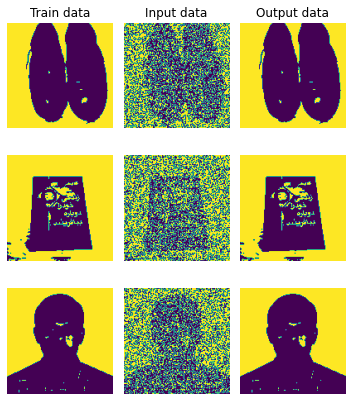

Show network weights matrix...


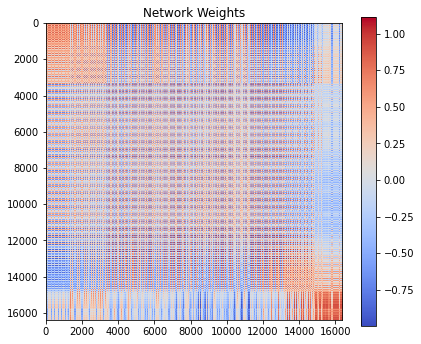

In [ ]:
import numpy as np
np.random.seed(1)
from matplotlib import pyplot as plt
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
import matplotlib.image as mpimg

def plot(data, test, predicted, figsize=(5, 6)):
    data = [reshape(d) for d in data]
    test = [reshape(d) for d in test]
    predicted = [reshape(d) for d in predicted]

    fig, axarr = plt.subplots(len(data), 3, figsize=figsize)
    for i in range(len(data)):
        if i==0:
           axarr[i, 0].set_title('Train data')
           axarr[i, 1].set_title("Input data")
           axarr[i, 2].set_title('Output data')

        axarr[i, 0].imshow(data[i])
        axarr[i, 0].axis('off')
        axarr[i, 1].imshow(test[i])
        axarr[i, 1].axis('off')
        axarr[i, 2].imshow(predicted[i])
        axarr[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig("result.png")
    plt.show()

# Utils
def get_corrupted_input(input, corruption_level):
    corrupted = np.copy(input)
    #Binomial distribution(30% of times=1)
    inv = np.random.binomial(n=1, p=corruption_level, size=len(input))
    for i, v in enumerate(input):
        if inv[i]==1:
          #for noise image
            corrupted[i] = -1 * v
    return corrupted

def reshape(data):
    #flatten to matrix
    dim = int(np.sqrt(len(data)))
    data = np.reshape(data, (dim, dim))
    return data


    data = [reshape(d) for d in data]
    test = [reshape(d) for d in test]
    predicted = [reshape(d) for d in predicted]

    fig, axarr = plt.subplots(len(data), 3, figsize=figsize)
    for i in range(len(data)):
        if i==0:
            axarr[i, 0].set_title('Train data')
            axarr[i, 1].set_title("Input data")
            axarr[i, 2].set_title('Output data')

        axarr[i, 0].imshow(data[i])
        axarr[i, 0].axis('off')
        axarr[i, 1].imshow(test[i])
        axarr[i, 1].axis('off')
        axarr[i, 2].imshow(predicted[i])
        axarr[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig("result.png")
    plt.show()

def preprocessing(img, w=128, h=128):
    # Resize image to w*h
    img = resize(img, (w,h), mode='reflect')

    # Thresholding
    # create binary image
    thresh = threshold_mean(img)
    binary = img > thresh
    shift = 2*(binary*1)-1 # Boolian to int

    # Reshape
    flatten = np.reshape(shift, (w*h))
    return flatten

def main():
    # Load data
    # RGB to GRAY image
    shoes=rgb2gray(mpimg.imread('/content/shoes.jpg'))
    book=rgb2gray(mpimg.imread('/content/book.jpg'))
    hossein=rgb2gray(mpimg.imread('/content/hossein.jpg'))
    # Marge data
    data = [shoes , book , hossein]
    # Preprocessing
    print("Start to data preprocessing...")
    data = [preprocessing(d) for d in data]

    # Create Hopfield Network Model
    model = HopfieldNetwork()
    model.train_weights(data)

    # Generate testset
    test = [get_corrupted_input(d, 0.35) for d in data]

    predicted = model.predict(test, threshold=0, asyn=False)
    print("Show prediction results...")
    plot(data, test, predicted)
    print("Show network weights matrix...")
    model.plot_weights()

if __name__ == '__main__':
    main()